In [1]:
#Biomeng261_L1_Part1.py
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [2]:
def dydt_p(t,y,prm):
    
    # parameters 
    k1  = prm[0]
    k_1 = prm[1]
    k2  = prm[2]

    # variables
    s = y[0]
    e = y[1]
    c = y[2] 
    p = y[3] 

    dydt = np.zeros(4)
    dydt[0] = -k1*e*s+k_1*c
    dydt[1] = -k1*e*s+(k_1+k2)*c
    dydt[2] = k1*e*s-(k_1+k2)*c
    dydt[3] = k2*c

    return dydt

In [3]:
dydt = lambda t, y: dydt_p(t,y,prm)

In [4]:
# Parameters
#               k1  k-1 k2 
prm = np.array([10.0, 19, 11])

In [5]:
# Initial conditions (uM)
S0 = 16.0
E0 = 1.0
C0 = 0.0
P0 = 0.0

y0 = np.array([S0,E0,C0,P0])

In [6]:
#note: dense output lets us choose how fine to plot the solution 
solution_object = solve_ivp(fun=dydt,t_span=[0,4],y0=y0,dense_output=True)
sol = solution_object.sol

In [7]:
t_sol = np.linspace(0,4,1000)
y_sol = sol(t_sol)

In [8]:
y_sol.shape

(4, 1000)

In [9]:
s = y_sol[0,:]
e = y_sol[1,:]
c = y_sol[2,:] 
p = y_sol[3,:] 

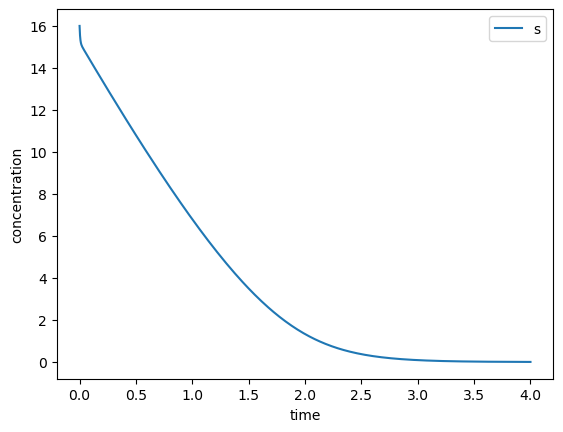

0.004688633646999726


In [10]:
plt.plot(t_sol,s,label='s')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()
print(s[-1])

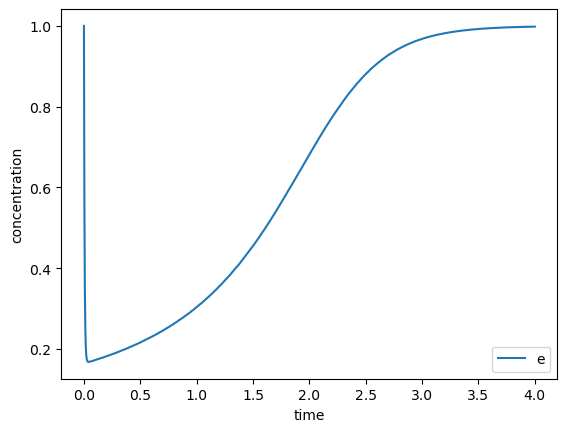

0.9982699150408553


In [11]:
plt.plot(t_sol,e,label='e')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()
print(e[-1])

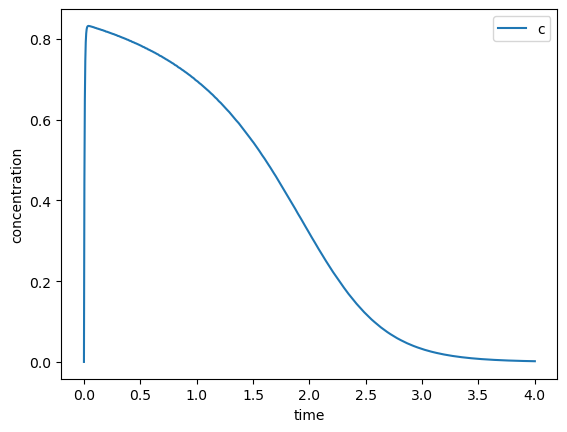

0.0017300849591449668


In [12]:
plt.plot(t_sol,c,label='c')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()
print(c[-1])

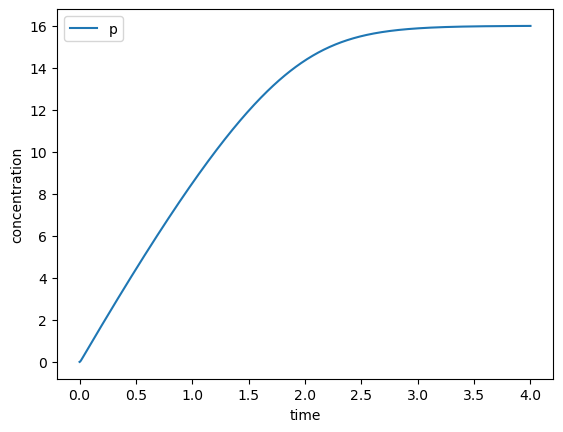

15.993581281393853


In [13]:
plt.plot(t_sol,p,label='p')
plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()
print(p[-1])

In [14]:
print(s[0], p[-1])
print(t_sol.shape)


16.0 15.993581281393853
(1000,)


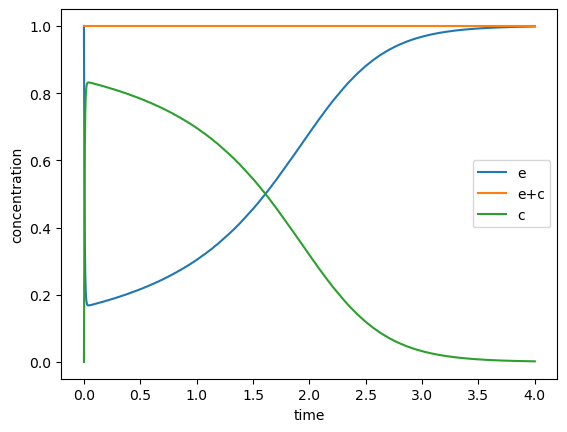

15.993581281393853


In [15]:
E0_arr = [E0] * 100000
# E0_arr = []

# for i in range(100000):
#    E0_arr[i].append(E0)

plt.plot(t_sol,e,label='e')
plt.plot(t_sol, e+c,label='e+c')
#plt.plot(t_sol, E0_arr, label='E0')
plt.plot(t_sol,c,label='c')

plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()
print(p[-1])

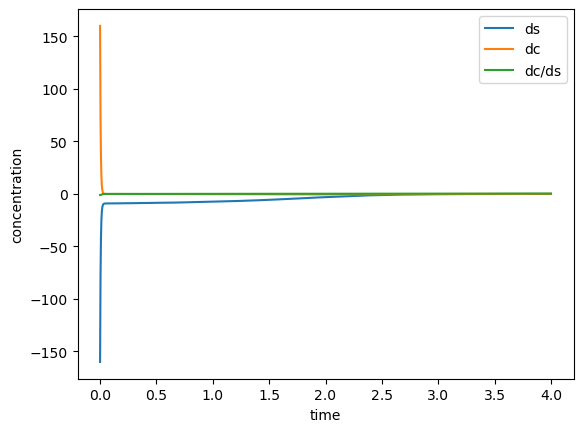

In [16]:
#               k1  k-1 k2 
# prm = np.array([10.0, 19, 11])
J_1 = prm[0] * s * e
J_n1 = prm[1] * c
J_2 = prm[2] * c

ds = -J_1 + J_n1
dc = J_1 - J_n1 - J_2

plt.plot(t_sol,ds,label='ds')
plt.plot(t_sol,dc,label='dc')
plt.plot(t_sol,dc/ds,label='dc/ds')

plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()



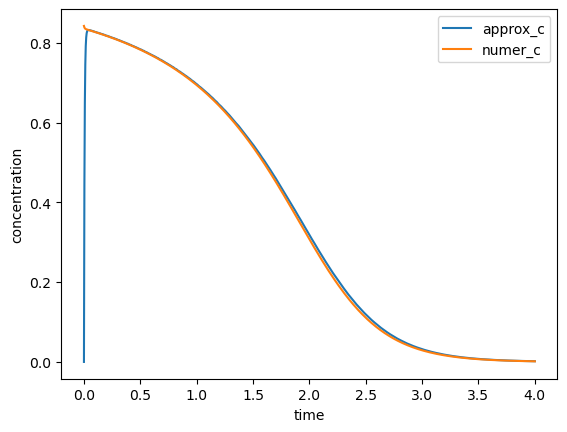

In [18]:
Vmax = prm[2] * E0
K_M = (prm[1] + prm[2]) / prm[0]
v_t = (Vmax * s) / (K_M + s)
dp = prm[2] * c
c_conc = v_t / prm[2]
plt.plot(t_sol,c,label='approx_c')
plt.plot(t_sol,c_conc,label='numer_c')

plt.xlabel('time')
plt.ylabel('concentration')
plt.legend()
plt.show()
    